# TensorFlow 2.0

In [1]:
from glob import glob

import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets 

import matplotlib.pyplot as plt
%matplotlib inline

## Hyperparameter Tunning

In [2]:
num_epochs = 10
batch_size = 32

learning_rate = 0.001

dropout_rate = 0.5

input_shape = (32, 32, 3)
num_classes = 10

## Build Model

In [3]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [4]:
# Model is the full model w/o custom layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),  # Optimization
              loss='categorical_crossentropy',  # Loss Function 
              metrics=['accuracy'])  # Metrics / Accuracy

# Data Preprocess

In [5]:
train_paths = glob('dataset/cifar/train/*.png')
test_paths = glob('dataset/cifar/test/*.png')

In [7]:
path = train_paths[0]
path

'dataset/cifar/train\\0_frog.png'

In [8]:
def get_class_name(path):
    fname = tf.strings.split(path, '_')[-1]
    lbl_name = tf.strings.regex_replace(fname, '.png', '')
    return lbl_name

In [9]:
path, get_class_name(path)

('dataset/cifar/train\\0_frog.png',
 <tf.Tensor: shape=(), dtype=string, numpy=b'frog'>)

In [10]:
class_names = [get_class_name(path) for path in train_paths]
class_names

[<tf.Tensor: shape=(), dtype=string, numpy=b'frog'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'automobile'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'frog'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'frog'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'ship'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'ship'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'cat'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'deer'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'frog'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'airplane'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'frog'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'truck'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'airplane'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'cat'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'frog'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'frog'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'dog'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'deer'>,
 <tf.Tensor: shape=(), dtype=strin

In [19]:
classes = tf.unique(class_names).y.numpy()
classes

array([b'frog', b'automobile', b'ship', b'cat', b'deer', b'airplane',
       b'truck', b'dog', b'bird', b'horse'], dtype=object)

In [21]:
def onehot_encoding(label_name):
    classes == get_class_name(path)
    onehot_encoding = tf.cast(classes == get_class_name(path), tf.uint8)
    return onehot_encoding

In [35]:
def read_dataset(path):
    # read image
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    
    image = tf.cast(image, tf.float32) / 255.
    
    # read label
    class_name = get_class_name(path)
    label = onehot_encoding(class_name)
    return image, label

In [24]:
image, label = read_dataset(path)
image.shape, label.shape

(TensorShape([32, 32, 3]), TensorShape([10]))

In [29]:
def image_preprocess(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image, label

In [30]:
transformed, label = image_preprocess(image, label)

In [31]:
transformed.shape

TensorShape([32, 32, 3])

<function matplotlib.pyplot.show(*args, **kw)>

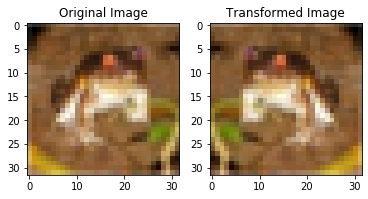

In [32]:
plt.subplot(121)
plt.title('Original Image')
plt.imshow(image)

plt.subplot(122)
plt.title('Transformed Image')
plt.imshow(transformed)
plt.show

In [36]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_paths)
train_dataset = train_dataset.map(read_dataset)
train_dataset = train_dataset.map(image_preprocess) # transform image
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.shuffle(buffer_size=len(train_paths))
train_dataset = train_dataset.repeat()

In [37]:
test_dataset = tf.data.Dataset.from_tensor_slices(test_paths)
test_dataset = test_dataset.map(read_dataset)
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.shuffle(buffer_size=len(test_paths))
test_dataset = test_dataset.repeat()

## Training

In [39]:
steps_per_epoch = len(train_paths)
validation_steps = len(test_paths)

In [ ]:
model.fit_generator(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_dataset,
    validation_steps=validation_steps,
    epochs=num_epochs
)

C:\Users\LGCNS\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
50000/50000 [==============================] - ETA: 0s - loss: 5.4427e-04 - accuracy: 0.9998